![](https://www.dii.uchile.cl/wp-content/uploads/2021/06/Magi%CC%81ster-en-Ciencia-de-Datos.png)

# Proyecto: 

**MDS7202: Laboratorio de Programación Científica para Ciencia de Datos**

### Cuerpo Docente:

- Profesor: Ignacio Meza De La Jara, Sebastián Tinoco
- Auxiliar: Catherine Benavides, Consuelo Rojas
- Ayudante: Eduardo Moya, Nicolás Ojeda


# Motivación

## De la Sombra a la Luz: El Legado de la Familia Mancini

En la oscura ciudad de Noirville, un banco ha sido conocido durante años como un centro de operaciones de la mafia. Bajo la dirección del infame Don Vittorio "El Zorro" Mancini, el banco prosperó, pero su reputación quedó manchada por actividades ilícitas y operaciones fraudulentas. Sin embargo, el curso de los acontecimientos cambió radicalmente cuando Don Vittorio falleció, dejando el banco en manos de su hijo, Marco Mancini.

Marco, un joven ambicioso con una visión diferente, se ha propuesto limpiar la reputación del banco y convertirlo en una institución legítima y respetada. Para lograrlo, necesita identificar y eliminar a todos los clientes con un pasado fraudulento que todavía utilizan el banco para sus actividades criminales.

Es así como ustedes entran a participar en un concurso de ML creado por Marco, creando un modelo de aprendizaje automático (ML) con el cual puedan identificar los casos fraudulentos. Esta es su oportunidad de demostrar sus habilidades y ayudar a Marco Mancini a transformar el legado de su familia, llevando al banco a una nueva era. 


## 1. Introducción [0.25 puntos]



- Describir brevemente el problema planteado ¿Qué se intenta predecir?
- Describir brevemente los datos de entrada que les provee el problema.
- Describir las métricas que utilizarán para evaluar los modelos generados. Elijan una métrica adecuada para el desarrollo del
proyecto según la tarea que deben resolver y la institución a la cuál será su contraparte y luego justifiquen su elección.
- Considerando que los datos presentan desbalanceo y que el uso de la métrica 'accuracy' sería incorrecto, enfoquen su
elección en una de las métricas precision, recall o f1-score y en la clase que será evaluada.
- Escribir al final] Describir brevemente los modelos que usaron para resolver el problema (incluyendo las transformaciones
intermedias de datos).
- Escribir al final] Indicar si lograron resolver el problema a través de su modelo final. Indiquen además si creen que los
resultados de su mejor modelo son aceptables y como les fue con respecto al resto de los equipos

- El problema, en primera instancia, se presenta como un intento de identificación de clientes "fraudulentos" o con pasados monetarios del mismo estilo en el banco de Marco Mancini. En este sentido, él mismo insta a la creación de un concurso de ML, donde se busca seleccionar un modelo de aprendizaje automático que se ajuste a esta identificación. Para este objetivo, se hace entrega de datos referenciales dedicados al entrenamiento de los modelos a desarrollar, donde se presentarán tres instancias para mostrar el progreso de los mismos. 

- Los datos de entrada contienen datos relacionados con los mismos clientes y el banco, como si se encuentran trabajando, su puntaje de riesgo, ingresos y cupo de créditos. Dado estos, se deberán establecer criterios que permitan considerar netamente las características que ayuden al modelo desarrollado. 

- Métricas? Aquí me surge la duda y prefiero conversarlo con el Seba. 

- Modelos finales 

- Resolución de problema

## 2. Modelos de Scikit Learn
### 2.1 Análisis Exploratorio de Datos [0.5 puntos]


Se comienza con el análisis exploratorio de datos, donde se observarán los archivos y sus relaciones internas. Para esto, se hacen las primeras importaciones: 

In [1]:
import pandas as pd
from utils import discrete_graph, cont_graph, exploratory_data_analysis, show_corr
SEED = 40 #seed para reproducibilidad

c:\Users\sebas\anaconda3\envs\pytorchgpu\lib\site-packages\dask\dataframe\_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


A continuación, se leen los archivos iniciales uno por uno, guardándolos en variables que serán utilizadas posteriormente.

In [2]:
X_t0 = pd.read_csv(r"X_t0")
y_t0 = pd.read_csv(r"y_t0")
X_t1 = pd.read_csv(r"X_t1")

Se resumen los dataframes con features, detallando características puntuales de cada uno. 

In [3]:
exploratory_data_analysis(X_t0)

El dataframe tiene 397039 filas y 31 columnas

El DataFrame esta compuesto por las siguientes columnas: ['DaysSinceJob' 'CreditCap' 'JobStatus' 'Speed24h' 'AliveSession'
 'BankSpots8w' 'HustleMinutes' 'RiskScore' 'AliasMatch' 'DeviceEmails8w'
 'CribStatus' 'LootMethod' 'InfoSource' 'HustleMonth' 'ZipHustle'
 'Speed4w' 'DeviceOS' 'income' 'FreeMail' 'HomePhoneCheck' 'BankMonths'
 'DOBEmails4w' 'ForeignHustle' 'DeviceScams' 'OldHoodMonths'
 'intended_balcon_amount' 'NewCribMonths' 'Speed6h' 'CellPhoneCheck'
 'customer_age' 'ExtraPlastic']

Primeras 5 filas:
 


,DaysSinceJob,CreditCap,JobStatus,Speed24h,AliveSession,BankSpots8w,HustleMinutes,RiskScore,AliasMatch,DeviceEmails8w,...,DOBEmails4w,ForeignHustle,DeviceScams,OldHoodMonths,intended_balcon_amount,NewCribMonths,Speed6h,CellPhoneCheck,customer_age,ExtraPlastic
0,0.006735,1500.0,CB,7850.955007,1,5,16.224843,163,0.986506,1,...,5,0,0,-1,102.453711,25,13096.035018,1,40,0
1,0.010095,1500.0,CA,5745.251481,1,3,3.363854,154,0.617426,1,...,18,0,0,-1,-0.849551,89,9223.283431,1,20,0
2,0.012316,200.0,CA,5471.988958,0,15,22.730559,89,0.996707,1,...,11,0,0,9,-1.490386,14,4471.472149,1,40,0
3,0.006991,200.0,CA,6755.344479,1,11,15.215816,90,0.475100,1,...,13,0,0,11,-1.863101,14,14431.993621,1,30,0
4,5.742626,200.0,CA,5124.046930,0,1,3.743048,91,0.842307,1,...,6,0,0,-1,47.152498,29,7601.511579,1,40,0


Info general de dataframe:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397039 entries, 0 to 397038
Data columns (total 31 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   DaysSinceJob            397039 non-null  float64
 1   CreditCap               397039 non-null  float64
 2   JobStatus               397039 non-null  object 
 3   Speed24h                397039 non-null  float64
 4   AliveSession            397039 non-null  int64  
 5   BankSpots8w             397039 non-null  int64  
 6   HustleMinutes           397039 non-null  float64
 7   RiskScore               397039 non-null  int64  
 8   AliasMatch              397039 non-null  float64
 9   DeviceEmails8w          397039 non-null  int64  
 10  CribStatus              397039 non-null  object 
 11  LootMethod              397039 non-null  object 
 12  InfoSource              397039 non-null  object 
 13  HustleMonth             397039 non-null  int64

,DaysSinceJob,CreditCap,Speed24h,AliveSession,BankSpots8w,HustleMinutes,RiskScore,AliasMatch,DeviceEmails8w,HustleMonth,...,DOBEmails4w,ForeignHustle,DeviceScams,OldHoodMonths,intended_balcon_amount,NewCribMonths,Speed6h,CellPhoneCheck,customer_age,ExtraPlastic
count,3.970390e+05,397039.000000,397039.000000,397039.000000,397039.000000,397039.000000,397039.000000,397039.000000,397039.000000,397039.000000,...,397039.000000,397039.000000,397039.0,397039.000000,397039.000000,397039.000000,397039.000000,397039.000000,397039.000000,397039.000000
mean,1.194997e+00,521.162631,5570.712126,0.609026,191.789630,8.393079,112.618186,0.514320,1.031297,1.011432,...,10.709935,0.027604,0.0,16.752354,9.254470,88.541015,6903.925002,0.876473,33.448452,0.184508
std,5.334243e+00,515.446406,1351.261338,0.487969,462.968776,8.648661,72.456036,0.286733,0.220586,0.823676,...,5.496432,0.163837,0.0,44.058472,20.251431,91.805720,3159.147744,0.329041,12.160613,0.387899
min,4.036860e-09,190.000000,1517.555809,0.000000,0.000000,-1.000000,-169.000000,0.000019,-1.000000,0.000000,...,0.000000,0.000000,0.0,-1.000000,-13.202786,-1.000000,-80.690670,0.000000,10.000000,0.000000
25%,7.218052e-03,200.000000,4602.212446,0.000000,1.000000,3.622840,60.000000,0.258522,1.000000,0.000000,...,6.000000,0.000000,0.0,-1.000000,-1.153763,19.000000,4592.756809,1.000000,20.000000,0.000000
50%,1.538161e-02,200.000000,5485.225013,1.000000,10.000000,5.535551,104.000000,0.523120,1.000000,1.000000,...,11.000000,0.000000,0.0,-1.000000,-0.788469,53.000000,6823.830632,1.000000,30.000000,0.000000
75%,2.737877e-02,990.000000,6625.724678,1.000000,31.000000,9.808629,158.000000,0.769828,1.000000,2.000000,...,14.000000,0.000000,0.0,12.000000,12.655739,133.000000,8847.104551,1.000000,40.000000,0.000000
max,7.658148e+01,2100.000000,9502.725577,1.000000,2381.000000,83.213536,389.000000,0.999999,2.000000,2.000000,...,39.000000,1.000000,0.0,372.000000,112.956928,425.000000,16715.565404,1.000000,90.000000,1.000000


Cantidad de valores nulos por columna:



DaysSinceJob                   0
CreditCap                      0
JobStatus                      0
Speed24h                       0
AliveSession                   0
BankSpots8w                    0
HustleMinutes                758
RiskScore                    374
AliasMatch                     0
DeviceEmails8w               184
CribStatus                     0
LootMethod                     0
InfoSource                     0
HustleMonth                    0
ZipHustle                      0
Speed4w                        0
DeviceOS                       0
income                         0
FreeMail                       0
HomePhoneCheck                 0
BankMonths                 97716
DOBEmails4w                    0
ForeignHustle                  0
DeviceScams                    0
OldHoodMonths             280119
intended_balcon_amount         0
NewCribMonths               1595
Speed6h                        0
CellPhoneCheck                 0
customer_age                   0
ExtraPlast

Cantidad de valores únicos por columna:



DaysSinceJob              395487
CreditCap                     12
JobStatus                      7
Speed24h                  396843
AliveSession                   2
BankSpots8w                 2282
HustleMinutes             395725
RiskScore                    547
AliasMatch                396859
DeviceEmails8w                 4
CribStatus                     7
LootMethod                     5
InfoSource                     2
HustleMonth                    3
ZipHustle                   6253
Speed4w                   396702
DeviceOS                       5
income                         9
FreeMail                       2
HomePhoneCheck                 2
BankMonths                    33
DOBEmails4w                   40
ForeignHustle                  2
DeviceScams                    1
OldHoodMonths                364
intended_balcon_amount    396263
NewCribMonths                420
Speed6h                   396800
CellPhoneCheck                 2
customer_age                   9
ExtraPlast

In [4]:
exploratory_data_analysis(X_t1)

El dataframe tiene 273865 filas y 31 columnas

El DataFrame esta compuesto por las siguientes columnas: ['DaysSinceJob' 'CreditCap' 'JobStatus' 'Speed24h' 'AliveSession'
 'BankSpots8w' 'HustleMinutes' 'RiskScore' 'AliasMatch' 'DeviceEmails8w'
 'CribStatus' 'LootMethod' 'InfoSource' 'HustleMonth' 'ZipHustle'
 'Speed4w' 'DeviceOS' 'income' 'FreeMail' 'HomePhoneCheck' 'BankMonths'
 'DOBEmails4w' 'ForeignHustle' 'DeviceScams' 'OldHoodMonths'
 'intended_balcon_amount' 'NewCribMonths' 'Speed6h' 'CellPhoneCheck'
 'customer_age' 'ExtraPlastic']

Primeras 5 filas:
 


,DaysSinceJob,CreditCap,JobStatus,Speed24h,AliveSession,BankSpots8w,HustleMinutes,RiskScore,AliasMatch,DeviceEmails8w,...,DOBEmails4w,ForeignHustle,DeviceScams,OldHoodMonths,intended_balcon_amount,NewCribMonths,Speed6h,CellPhoneCheck,customer_age,ExtraPlastic
0,0.027266,1500.0,CA,7190.962740,1,1,25.908272,230,0.389021,1,...,5,0,0,-1,-0.606947,48,9582.063142,1,50,0
1,0.010911,200.0,CA,4118.268558,1,1,4.240641,112,0.069858,1,...,7,1,0,119,-1.112835,4,1574.485203,1,30,0
2,0.943734,200.0,CA,5236.372041,0,2,11.019222,73,0.328285,1,...,9,0,0,100,-0.433109,27,8173.509757,1,30,0
3,0.462307,1000.0,CA,4716.560298,1,1,16.818389,215,0.167489,1,...,2,0,0,-1,-1.154959,158,3677.795054,0,50,0
4,0.002047,200.0,CA,5397.528448,1,1794,33.486803,72,0.651517,1,...,12,0,0,-1,51.871481,41,7268.270092,1,50,0


Info general de dataframe:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273865 entries, 0 to 273864
Data columns (total 31 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   DaysSinceJob            273865 non-null  float64
 1   CreditCap               273865 non-null  float64
 2   JobStatus               273865 non-null  object 
 3   Speed24h                273865 non-null  float64
 4   AliveSession            273865 non-null  int64  
 5   BankSpots8w             273865 non-null  int64  
 6   HustleMinutes           273865 non-null  float64
 7   RiskScore               273865 non-null  int64  
 8   AliasMatch              273865 non-null  float64
 9   DeviceEmails8w          273865 non-null  int64  
 10  CribStatus              273865 non-null  object 
 11  LootMethod              273865 non-null  object 
 12  InfoSource              273865 non-null  object 
 13  HustleMonth             273865 non-null  int64

,DaysSinceJob,CreditCap,Speed24h,AliveSession,BankSpots8w,HustleMinutes,RiskScore,AliasMatch,DeviceEmails8w,HustleMonth,...,DOBEmails4w,ForeignHustle,DeviceScams,OldHoodMonths,intended_balcon_amount,NewCribMonths,Speed6h,CellPhoneCheck,customer_age,ExtraPlastic
count,2.738650e+05,273865.000000,273865.000000,273865.000000,273865.000000,273865.000000,273865.000000,2.738650e+05,273865.000000,273865.000000,...,273865.000000,273865.000000,273865.0,273865.000000,273865.000000,273865.000000,273865.000000,273865.000000,273865.000000,273865.000000
mean,7.645298e-01,530.131415,4423.674687,0.527001,201.291468,7.159462,145.330572,4.751979e-01,1.014420,4.538572,...,7.629730,0.024611,0.0,11.408734,7.371648,103.920264,5064.681210,0.867668,41.322695,0.282650
std,4.836760e+00,486.703434,1146.470058,0.499271,484.029637,7.637807,66.736594,2.918530e-01,0.167483,0.498511,...,4.424689,0.154936,0.0,39.225315,19.781378,92.361811,2488.569646,0.338852,14.022637,0.450289
min,2.459462e-07,190.000000,1327.867307,0.000000,0.000000,-1.000000,-161.000000,7.898994e-07,-1.000000,4.000000,...,0.000000,0.000000,0.0,-1.000000,-15.537329,-1.000000,-113.046899,0.000000,10.000000,0.000000
25%,7.277786e-03,200.000000,3496.231682,0.000000,1.000000,2.674863,98.000000,2.069082e-01,1.000000,4.000000,...,5.000000,0.000000,0.0,-1.000000,-1.212193,33.000000,3286.665066,1.000000,30.000000,0.000000
50%,1.523408e-02,200.000000,4508.811053,1.000000,10.000000,4.905293,137.000000,4.447992e-01,1.000000,5.000000,...,7.000000,0.000000,0.0,-1.000000,-0.887155,72.000000,5001.583758,1.000000,50.000000,0.000000
75%,2.581541e-02,990.000000,5184.803136,1.000000,30.000000,8.676124,189.000000,7.448203e-01,1.000000,5.000000,...,10.000000,0.000000,0.0,-1.000000,-0.393081,158.000000,6644.933533,1.000000,50.000000,1.000000
max,7.628622e+01,2100.000000,9472.491584,1.000000,2377.000000,81.950296,383.000000,9.999997e-01,2.000000,5.000000,...,38.000000,1.000000,0.0,399.000000,112.461838,413.000000,16310.021320,1.000000,90.000000,1.000000


Cantidad de valores nulos por columna:



DaysSinceJob                   0
CreditCap                      0
JobStatus                      0
Speed24h                       0
AliveSession                   0
BankSpots8w                    0
HustleMinutes                676
RiskScore                     59
AliasMatch                     0
DeviceEmails8w                91
CribStatus                     0
LootMethod                     0
InfoSource                     0
HustleMonth                    0
ZipHustle                      0
Speed4w                        0
DeviceOS                       0
income                         0
FreeMail                       0
HomePhoneCheck                 0
BankMonths                 66366
DOBEmails4w                    0
ForeignHustle                  0
DeviceScams                    0
OldHoodMonths             222914
intended_balcon_amount         0
NewCribMonths                617
Speed6h                        0
CellPhoneCheck                 0
customer_age                   0
ExtraPlast

Cantidad de valores únicos por columna:



DaysSinceJob              272950
CreditCap                     12
JobStatus                      7
Speed24h                  273771
AliveSession                   2
BankSpots8w                 2259
HustleMinutes             272967
RiskScore                    511
AliasMatch                273751
DeviceEmails8w                 4
CribStatus                     7
LootMethod                     5
InfoSource                     2
HustleMonth                    2
ZipHustle                   5252
Speed4w                   273426
DeviceOS                       5
income                         9
FreeMail                       2
HomePhoneCheck                 2
BankMonths                    32
DOBEmails4w                   39
ForeignHustle                  2
DeviceScams                    1
OldHoodMonths                365
intended_balcon_amount    273462
NewCribMonths                404
Speed6h                   273755
CellPhoneCheck                 2
customer_age                   9
ExtraPlast

Se muestran correlaciones:

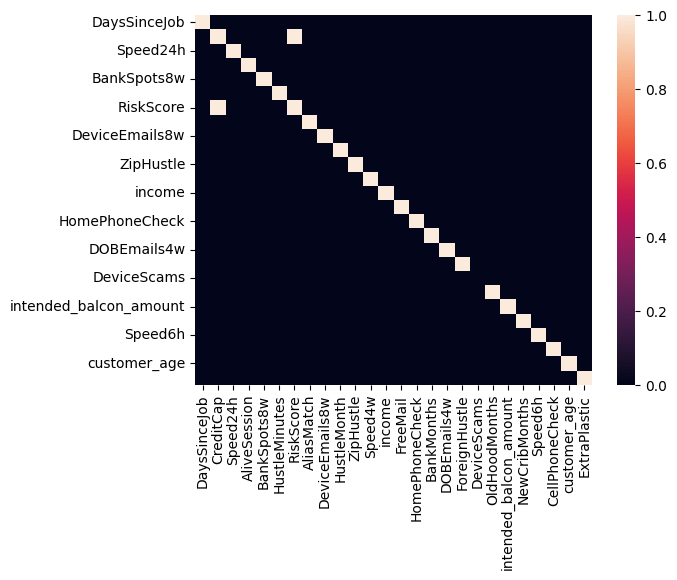

In [5]:
show_corr(X_t0)

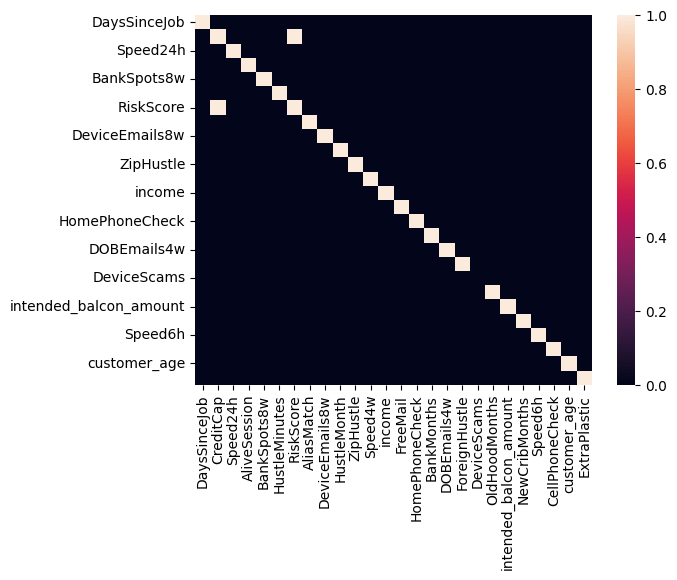

In [6]:
show_corr(X_t1)

Algunas anotaciones que pueden ser relevantes para el posterior procesamiento se dejan a continuación:
- JobStatus, CribStatus, LootMethod, InfoSource, DeviceOS son categóricas y deben ser codificadas.
- DeviceScams solo posee un valor (se puede descartar).
- RiskScore y CreditCap son las features más correlacionadas entre ellas mismas.
- Variables categóricas: JobStatus, CribStatus, LootMethod, InfoSource, DeviceOS, CreditCap*, AliveSession, DeviceEmails8w, HustleMonth, income*, FreeMail, HomePhoneCheck, ForeignHustle, CellPhoneCheck, customer_age, ExtraPlastic.   
- Variables discretas: BankSpots8w, RiskScore, ZipHustle, OldHoodMonths, NewCribMonths, CreditCap*, income*, BankMonths, DOBEmails4w
- Variables continuas: DaysSinceJob, Speed24h, HustleMinutes, AliasMatch, Speed4w, intended_balcon_amount, Speed6h.

In [7]:
#Histograma simple
cols_discrete ='JobStatus, CribStatus, LootMethod, InfoSource, DeviceOS, AliveSession, DeviceEmails8w, HustleMonth, FreeMail, HomePhoneCheck, ForeignHustle, CellPhoneCheck, customer_age, ExtraPlastic, BankSpots8w, RiskScore, ZipHustle, OldHoodMonths, NewCribMonths, CreditCap, income, BankMonths, DOBEmails4w'.split(", ")
#Box + histograma 
cols_continuous = 'DaysSinceJob, Speed24h, HustleMinutes, AliasMatch, Speed4w, intended_balcon_amount, Speed6h'.split(", ")

Se arman gráficos para ver distribuciones (forman archivos .html, ya que el display es muy pesado y ralentiza el notebook):

In [8]:
#discrete_graph(cols_discrete)
#cont_graph(cols_continuous)

De los gráficos anteriores se saca la siguiente información:
...............

### 2.2 Pre-Procesamiento de datos [0.25 puntos]




Con la información obtenida del EDA, se plantea el siguiente preprocesamiento para las distintas variables:
- income: encodeable.
- AliasMatch: Variable de 0 a 1 continua.
- OldHoodMonths: Demasiados nulos, con lo cual se botará.
- NewCribMonths: Variable continua, debe ser escalada.
- customer_age: Variable encodeable
- DaysSinceJob***
- intended_balcon_amount: Contiene valores negativos, se debe escalar.
- LootMethod: Variable encodeable.
- ZipHustle: Se debe escalar (posible StandardScaler)
- Speed6h: Se debe escalar (posible StandardScaler)
- Speed24h: Se debe escalar (posible StandardScaler)
- Speed4w: Se debe escalar (RobustScaler)
- BankSpots8w: Se debe escalar (RobustScaler para outliers)
- DOBEmails4w: Se debe escalar (RobustScaler)
- JobStatus: Variable Encodeable
- RiskScore: Posee valores negativos (posible StandardScaler)
- FreeMail: Variable ya encodeada.
- CribStatus: Variable encodeable.
- HomePhoneCheck: Variable ya encodeada.
- CellPhoneCheck: Variable ya encodeada.
- BankMonths: tiene nulos, se debe escalar (RobustScaler)
- ExtraPlastic: Variable ya encodeada.
- CreditCap***
- ForeignHustle: Variable ya encodeada.
- InfoSource: Se debe encodear (muy predominante internet sobre teleapp)
- HustleMinutes: Tiene nulos, se debe escalar (RobustScaler)
- DeviceOS: Se debe encodear.
- AliveSession: Variable ya encodeada.
- DeviceEmails8w: Tiene nulos, se debe encodear.
- DeviceScams: Solo contiene 0s. Se debe eliminar.
- HustleMonth: Se debe encodear.

Dada la cantidad de outliers que se pueden visualizar, se utilizará el RobustScaler.

Se importan las librerías necesarias para el preprocesamiento:

In [9]:
from sklearn.preprocessing import RobustScaler, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from utils import rename_features_after_imputer

Se definen las variables a pre-procesar para cada step:

In [10]:
robust_scaler_features = "AliasMatch,NewCribMonths,customer_age,intended_balcon_amount,BankSpots8w,DOBEmails4w,BankMonths,CreditCap,DaysSinceJob,ZipHustle,Speed6h,Speed24h,RiskScore,HustleMinutes,Speed4w"
botar = "OldHoodMonths,DeviceScams"
imputer_features = "BankMonths,HustleMinutes,DeviceEmails8w,RiskScore,NewCribMonths"
one_hot_features = "income,JobStatus,CribStatus,LootMethod,InfoSource,DeviceOS,HustleMonth,DeviceEmails8w"
pass_features = "AliveSession,CellPhoneCheck,ExtraPlastic,ForeignHustle,FreeMail,HomePhoneCheck"

Con las anotaciones anteriores, se construye un ColumnTransformer de la siguiente manera:

In [11]:
#Primero se construye el imputer, ya que cambia el nombre de columnas
imputer = ColumnTransformer([("imputer",SimpleImputer(missing_values=-1,strategy="mean"),imputer_features.split(","))],
                            remainder="passthrough")
imputer.set_output(transform='pandas')

col_transformer = ColumnTransformer([("encoder",OneHotEncoder(drop="first",handle_unknown="infrequent_if_exist",sparse_output=False),rename_features_after_imputer(imputer_features,one_hot_features).split(",")),
                                     ("RobustScaler",RobustScaler(),rename_features_after_imputer(imputer_features,robust_scaler_features).split(",")),
                                     ("passthrough","passthrough",rename_features_after_imputer(imputer_features,pass_features).split(","))],
                                     remainder = "drop")
col_transformer.set_output(transform='pandas')

preprocessing_pipeline = Pipeline([("imputer",imputer),
                     ("col_transformer",col_transformer)])

Reducción de dimensionalidad:

Se hace el Hold-out 70/30 estratificado de manera de mantener proporciones de las etiquetas:

In [12]:
X_t0_train,X_t0_val,y_t0_train,y_t0_val = train_test_split(X_t0,y_t0.is_mob,test_size=0.3,random_state=40,stratify=y_t0.is_mob)

### 2.3 Baseline [0.25 puntos]



Como modelo guía se utilizará un DummyClassifier, pues en principio se quiere ver un clasificador no tan complejo, de manera de evaluar el desempeño de los modelos posteriores y ver si mejoran lo más básico.

In [13]:
from sklearn.dummy import DummyClassifier
from utils import eval_pipe

In [14]:
baseline = Pipeline([("imputer",imputer),
                     ("col_transformer",col_transformer),
                     ("classifier",DummyClassifier())])

In [15]:
baseline.fit(X_t0_train,y_t0_train)

Pipeline(steps=[('imputer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('imputer',
                                                  SimpleImputer(missing_values=-1),
                                                  ['BankMonths',
                                                   'HustleMinutes',
                                                   'DeviceEmails8w',
                                                   'RiskScore',
                                                   'NewCribMonths'])])),
                ('col_transformer',
                 ColumnTransformer(transformers=[('encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='infrequent_if_exist',
                                                                sparse_output=Fal...
                                                   'remainder__ZipHustle',
                                                   'remainder__Speed6h',
                                                   'remainder__Speed24h',
                                                   'imputer__RiskScore',
                                                   'imputer__HustleMinutes',
                                                   'remainder__Speed4w']),
                                                 ('passthrough', 'passthrough',
                                                  ['remainder__AliveSession',
                                                   'remainder__CellPhoneCheck',
                                                   'remainder__ExtraPlastic',
                                                   'remainder__ForeignHustle',
                                                   'remainder__FreeMail',
                                                   'remainder__HomePhoneCheck'])])),
                ('classifier', DummyClassifier())])

In [16]:
eval_pipe(baseline,X_t0_val,y_t0_val)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    117943
           1       0.00      0.00      0.00      1169

    accuracy                           0.99    119112
   macro avg       0.50      0.50      0.50    119112
weighted avg       0.98      0.99      0.99    119112



c:\Users\sebas\anaconda3\envs\pytorchgpu\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sebas\anaconda3\envs\pytorchgpu\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sebas\anaconda3\envs\pytorchgpu\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

Con lo visto en los resultados, es notorio que el clasificador es malo, pues no detecta ningún caso fraudulento que es el objetivo del problema. Esto ocurre debido a que lo más facil para el clasificador, de manera de tener la mayor cantidad de aciertos posibles, es simplemente clasificar toda muestra con un 0, la cual es la clase mayoritaria.

### 2.4 Modelos de ML [0.5 puntos]


Los modelos con los que se experimentará son LightGBMClassifier (LGBM), XGBClassifier (XGB) y RandomForestClassifier (RFC). 

Las principales diferencias entre estos modelos se listan a continuación:
-  RandomForestClassifier construye árboles de manera paralela e independiente. En cambio los otros dos modelos utilizan boosting, es decir se van construyendo de manera secuencual para optimizar una función de pérdida, de manera que cada árbol nuevo intenta corregir errores anteriores.
- RandomForestClassifier es mucho más lento al entrenarse que los otros dos modelos.
- La diferencia entre el LightGBMClassifier y el XGBClassifier radica en  el algoritmo utilizado, pues XGBoost ocupa una técnica de optimización basada en gradientes y regularización, mientras que LGBM ocupa la ténica GOSS y EFB.
- LGBM suele ser más rápido para conjuntos de datos muy grandes.

Los hiperparámetros que se considerarán para el presente trabajo son (nombre iguales tienen interpretaciones iguales):

Para LGBM:
- num_leaves: Se refiere al npumero máximo de hojas en un árbol.
- max_depth: Profundida máxima alcanzada por cada árbol de desición del modelo
- learning_rate: Tasa de aprendizaje con la que los gradientes actualizan los pesos del modelo.
- n_estimators: Número de árboles que se construyen en el proceso de boosting.
- min_child_samples: Número mínimo de datos requeridos para formar una nueva partición en un nodo del árbol.
- reg_alpha: Parámetro de regularización L1.
- reg_lambda: Parámetro de regularización L2.

Para XGB:
- learning_rate
- n_estimators
- max_depth
- max_leaves
- min_child_weight: Suma mínima de pesos de todas las observaciones para poder generar un nodo hijo.
- reg_alpha
- reg_lambda

Para RFC:
- n_estimators
- max_depth
- min_samples_split: número mínimo de muestras para poder dividir un nodo interno durante la construcción del árbol.


In [17]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

A continuación se muestran resultados utilizando clasificadores no optimizados, con ciertos parámetros útiles para el desbalance de clases del problema:

In [18]:
pipeline_lgbm = Pipeline([("imputer",imputer),
                     ("col_transformer",col_transformer),
                     ("classifier",LGBMClassifier(class_weight="balanced",random_state=SEED))])

pipeline_xgb = Pipeline([("imputer",imputer),
                     ("col_transformer",col_transformer),
                     ("classifier",XGBClassifier(scale_pos_weight=100,random_state=SEED))])

pipeline_rf = Pipeline([("imputer",imputer),
                     ("col_transformer",col_transformer),
                     ("classifier",RandomForestClassifier(class_weight="balanced",random_state=SEED))])

Se entrenan los modelos:

In [19]:
#pipeline_lgbm.fit(X_t0_train,y_t0_train)
#pipeline_xgb.fit(X_t0_train,y_t0_train)
#pipeline_rf.fit(X_t0_train,y_t0_train)

Se evaluan los modelos sin optimizar:

LGBM

In [ ]:
eval_pipe(pipeline_lgbm,X_t0_val,y_t0_val)

XGB

In [26]:
eval_pipe(pipeline_xgb,X_t0_val,y_t0_val)

              precision    recall  f1-score   support

           0       0.99      0.94      0.96    117943
           1       0.07      0.49      0.12      1169

    accuracy                           0.93    119112
   macro avg       0.53      0.71      0.54    119112
weighted avg       0.99      0.93      0.96    119112



RFC

In [27]:
eval_pipe(pipeline_rf,X_t0_val,y_t0_val)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    117943
           1       0.50      0.00      0.00      1169

    accuracy                           0.99    119112
   macro avg       0.75      0.50      0.50    119112
weighted avg       0.99      0.99      0.99    119112



- En general, se ve que el RFC sin optimizar no da buenos resultados, siendo practicamente igual al baseline. No así los otros dos modelos, que con parámetros estándar dan resultados mejores.
- Sin optimizar el que mejor performea, según las métricas escogidas para la evaluación, con hiperparámetros estandar y solo con pesos para el desbalanceo de clase es el XGBoost.
- Con respecto a tiempos de entrenamiento con grilla, en general los modelos LGBM y XGB deberían ser más ligeros a la hora de ser entrenados con grillas amplias, en especial al momento de aumentar estimators, pues usan boosting, lo cual los hace más eficientes en terminos de tiempos de entrenamiento.

### 2.5 Optimización de modelos [0.5 puntos]



La optimización de los modelos se hizo por medio de optuna, otorgando grillas de hiperparámetros del imputer, del one hot encoder y de los modelos utilizados. A continuación se muestran las grillas utilizadas:
```python

params_lgbm = {"num_leaves": trial.suggest_int("num_leaves",30,120),
                            "max_depth": trial.suggest_int("max_depth",3,10),
                            "learning_rate": trial.suggest_float("learning_rate",0.001,0.1,log=True),
                            "n_estimators": trial.suggest_int("n_estimators ",20,100),
                            "min_child_samples":trial.suggest_int("min_child_samples",5,10),
                            "reg_alpha": trial.suggest_float("reg_alpha",0,1),
                            "reg_lambda": trial.suggest_float("reg_lambda",0,1)}

params_xgb = {"learning_rate": trial.suggest_float("learning_rate",0.01,0.1,log=True),
                            "n_estimators": trial.suggest_int("n_estimators",20,1000),
                            "max_depth": trial.suggest_int("max_depth",20,100),
                            "max_leaves": trial.suggest_int("max_leaves",5,20),
                            "min_child_weight": trial.suggest_int("min_child_weight",1,5),
                            "reg_alpha": trial.suggest_float("reg_alpha",0,1),
                            "reg_lambda": trial.suggest_float("reg_lambda",0,1)}

params_rfc = {"n_estimators": trial.suggest_int("n_estimators",30,1000),
                            "max_depth": trial.suggest_int("max_depth",5,50),
                            "min_samples_split":trial.suggest_int("min_samples_split",2,5)}
                            
params_encoder = {"drop":"first",
                              "sparse_output":False,
                              "handle_unknown":"ignore",
                            "min_frequency":trial.suggest_float("min_frequency",0,1)}
                            
params_imputer = {"strategy": trial.suggest_categorical("strategy",
                  ["mean","median","most_frequent"])}
    
```
El número de trials hechos para cada modelo se detalla a continuación:
- LGBM: 300
- XGB: 300
- RFC: 100 (demora bastante más que los otros dos).

El objetivo de la optimización fue maximizar el F1-Score, ya que es la métrica a utilizar para la evaluación de los modelos en este problema en particular. Además todos los modelos fueron dotados de hiperparámetros para evadir el desbalance de clases. En este sentido, tanto al LGBM como al RFC se le asignó un class_weight= "balanced", mientras que al XGB, se le puso scale_pos_weight=100, de manera de que valga 100 veces más el hecho de acertar un caso de fraude positivo (clase minoritaria) que el acertar un caso de no fraude (clase predominante).

La implementación de la optimización está hecha mediante el ejecutable optimization.py, el cual hace el proceso de optimización y guarda el mejor trial en un .csv que se va actualizando en caso de ejecutarse la optimización con los mismos parámetros nuevamente.

A continuación se muestran los hiperparámetros óptimos encontrados para los 3 pipelines:

In [20]:
grilla_rfc = {'n_estimators': 764, 'max_depth': 17, 'min_samples_split': 5, 'min_frequency': 0.10210064898288551, 'strategy': 'most_frequent'}
grilla_lgbm = {'num_leaves': 115, 'max_depth': 10, 'learning_rate': 0.09994559377723443, 'n_estimators': 98, 'min_child_samples': 7, 'reg_alpha': 0.47424359515002923, 'reg_lambda': 0.5473251744044133, 'min_frequency': 0.11915326897527226, 'strategy': 'median'}
grilla_xgb = {'learning_rate': 0.0994954964874837, 'n_estimators': 1000, 'max_depth': 36, 'max_leaves': 20, 'min_child_weight': 1, 'reg_alpha': 0.19477074063657726, 'reg_lambda': 0.5446629837717306, 'min_frequency': 0.06521494511749937, 'strategy': 'most_frequent'}

Finalmente se muestra el score obtenido: (entrenar solo si se quiere reproducir)

In [ ]:
from utils import pipe_lgbm, pipe_rfc, pipe_xgb

pipe_rfc_t0 = pipe_rfc(grilla_rfc).fit(X_t0_train,y_t0_train)
pipe_lgbm_t0 = pipe_lgbm(grilla_lgbm).fit(X_t0_train,y_t0_train)
pipe_xgb_t0 = pipe_xgb(grilla_xgb).fit(X_t0_train,y_t0_train)

LGBM

In [22]:
eval_pipe(pipe_lgbm_t0,X_t0_val,y_t0_val)

              precision    recall  f1-score   support

           0       1.00      0.94      0.96    117943
           1       0.08      0.54      0.14      1169

    accuracy                           0.93    119112
   macro avg       0.54      0.74      0.55    119112
weighted avg       0.99      0.93      0.96    119112



XGB

In [24]:
eval_pipe(pipe_xgb_t0,X_t0_val,y_t0_val)

              precision    recall  f1-score   support

           0       0.99      0.94      0.97    117943
           1       0.08      0.47      0.13      1169

    accuracy                           0.94    119112
   macro avg       0.54      0.71      0.55    119112
weighted avg       0.99      0.94      0.96    119112



RFC

In [25]:
eval_pipe(pipe_rfc_t0,X_t0_val,y_t0_val)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    117943
           1       0.19      0.15      0.17      1169

    accuracy                           0.99    119112
   macro avg       0.59      0.57      0.58    119112
weighted avg       0.98      0.99      0.98    119112



A pesar de que el modelo RFC tiene las mejores métricas, el hecho de que demore tanto en entrenarse se ve como un limitante a la hora de hacer pruebas para el presente trabajo. Por lo mismo y como la diferencia no es tanta, se tomará el segundo mejor modelo. En este caso este modelo es el LGBM.

Se guarda pipeline lgbm_t0

In [163]:
import pickle

with open('lgbm_t0.pkl','wb') as file:
    pickle.dump(pipe_lgbm_t0,file)

Se carga pipeline lgbm_t0

In [164]:
with open('lgbm_t0.pkl', 'rb') as file:
    model_t0 = pickle.load(file)

### 2.6 Interpretabilidad [0.5 puntos]


In [22]:
from engine.modelEngine import Clf

In [23]:
lgbm_clf = Clf("lgbm")
lgbm_clf.load("lgbm_t0.pkl","t0")

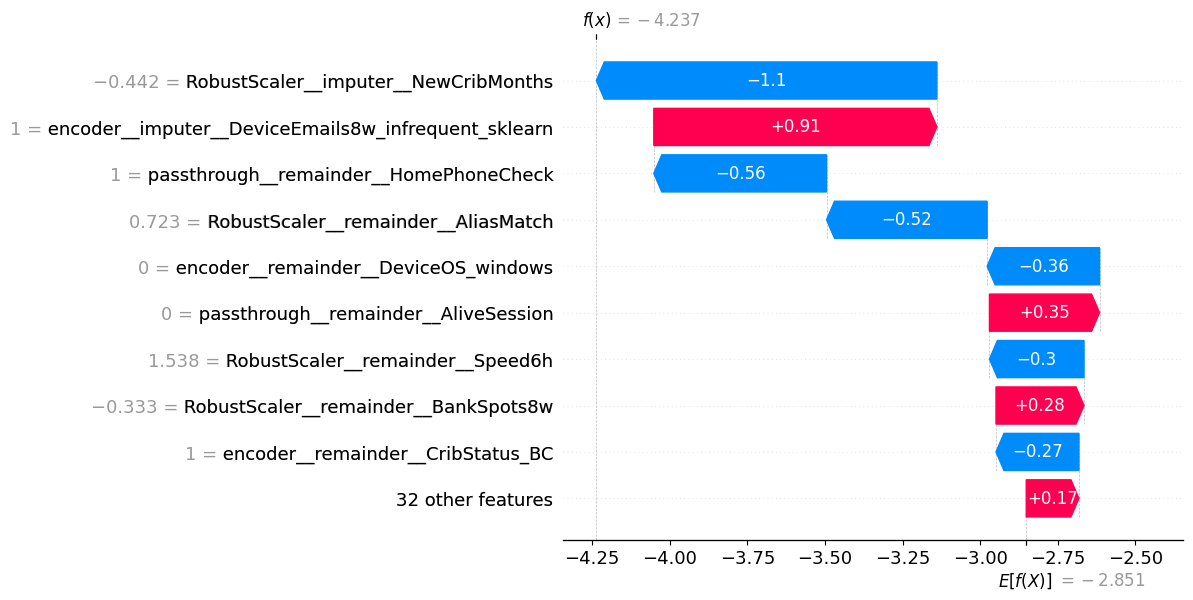

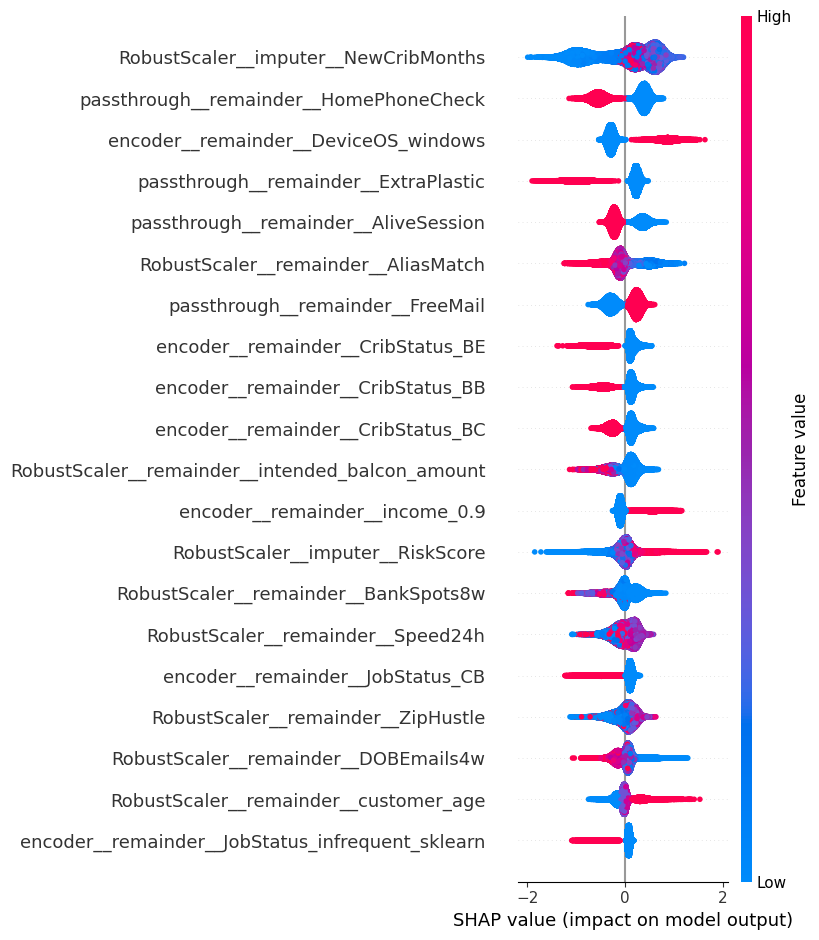

In [24]:
lgbm_clf.shap(X_t0_val)

## 3. MLOPS [2.5 puntos]


Se cargan datos

In [25]:
X_t1 = pd.read_csv("X_t1")
y_t1 = pd.read_csv("y_t1")
X_t2 = pd.read_csv("X_t2")

Se mira drift:

Se evalua sobre nueva data:

In [29]:
lgbm_clf.eval(X_t1,y_t1.is_mob)

c:\Users\sebas\anaconda3\envs\pytorchgpu\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


              precision    recall  f1-score   support

           0       0.99      0.88      0.94    270541
           1       0.06      0.63      0.11      3324

    accuracy                           0.88    273865
   macro avg       0.53      0.76      0.53    273865
weighted avg       0.98      0.88      0.93    273865



Se divide nuevo set de datos:

In [30]:
X_t1_train,X_t1_val,y_t1_train,y_t1_val = train_test_split(X_t1,y_t1.is_mob,test_size=0.3,random_state=SEED,stratify=y_t1.is_mob)

Se reentrena el modelo:

In [31]:
lgbm_clf.retrain(X_t1_train,y_t1_train,"t1")

c:\Users\sebas\anaconda3\envs\pytorchgpu\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Se evalua:

In [33]:
lgbm_clf.eval(X_t1_val,y_t1_val)

c:\Users\sebas\anaconda3\envs\pytorchgpu\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


              precision    recall  f1-score   support

           0       0.99      0.94      0.96     81163
           1       0.08      0.47      0.14       997

    accuracy                           0.93     82160
   macro avg       0.54      0.71      0.55     82160
weighted avg       0.98      0.93      0.95     82160



Se guarda:

In [34]:
lgbm_clf.save()

Se reoptimiza:

## 4. Resultados [0.5 puntos]


Para la primera iteración, se obtuvieron las siguientes métricas:


## 5. Conclusiones y Discusión [0.25 puntos]



# Anexos
Utilizar la función `generateFiles` para generar el archivo a entregar en la competencia.

In [ ]:
from zipfile import ZipFile
import os

def generateFiles(predict_data, clf_pipe):
    """Genera los archivos a subir en CodaLab

    Input
    ---------------
    predict_data: Dataframe con los datos de entrada a predecir
    clf_pipe: pipeline del clf

    Ouput
    ---------------
    archivo de txt
    """
    y_pred_clf = clf_pipe.predict_proba(predict_data)[:, 1]
    
    with open('./predictions.txt', 'w') as f:
        for item in y_pred_clf:
            f.write("%s\n" % item)

    with ZipFile('predictions.zip', 'w') as zipObj:
       zipObj.write('predictions.txt')
    os.remove('predictions.txt')

generateFiles(X_test, dummy_clf)

In [ ]:
generateFiles(X_test, clf_pipeline)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=dd551f41-bcb0-479a-b27b-74b6acf18d68' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>